# Practica: Real Estate

---

- Number of Classes: 3 (-500.000$=0/-1.000.000$=1)
- Number of Samples: 178 
- Number of Features: 13 (chemical attributes)

### Importar el csv con los datos y editar los datos

In [106]:
import numpy as np

iris = np.genfromtxt(
    "./data.csv",
    delimiter=",",
    dtype=[('price', 'int32'), ('data', 'int32', (9,))],  
    usecols=(1,2,3,4,5,6,9,10,12,13),
    skip_header=1
)

### Cambia valores que sean mayor que 1 a 1

In [107]:
#iris['data'][:, -1] = np.where(iris['data'][:, -1] >= 1, 1, iris['data'][:, -1])

### Editar valores para separar en tres rangos distintos
-500.000\\$=0  /  -1.000.000\\$=1  /  +1.000.000\\$ = 2

In [108]:
price_category = np.where(
    iris['price'] < 500000, 0, 
    np.where(iris['price'] <= 1000000, 1, 2)
)

### Separar muestras de Entrenamiento y de Test

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'], price_category, test_size=0.2)

In [110]:
## use a random forest classifier to identify the wines
from sklearn.ensemble import RandomForestClassifier

## Get the accuracy of your model
from sklearn.metrics import accuracy_score

clF1 = RandomForestClassifier() # Crear l'instancia de classificador
clF1.fit(X_train, y_train) # entrenament ("forward + backward N vegades")

y_pred = clF1.predict(X_test) # forward o utilitzar el model

acc = accuracy_score(y_test, y_pred)

print(acc)

0.7076086956521739


### Arbol de decisión

0.6304347826086957


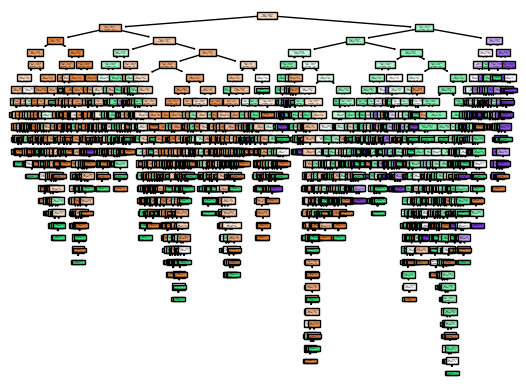

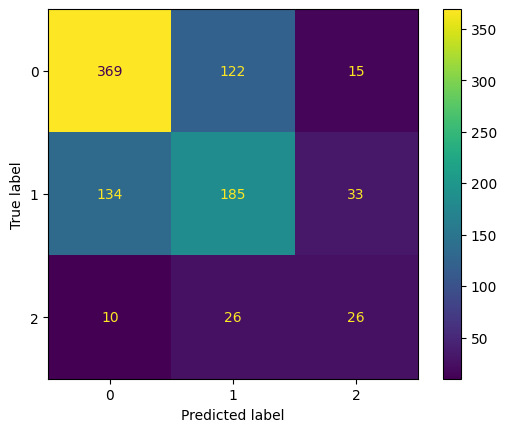

In [111]:
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay


classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

tree.plot_tree(classifier, filled=True)

ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

### Mejores datos

In [114]:
from sklearn.feature_selection import SelectKBest

reductor_dim = SelectKBest(k=3)
reductor_dim.fit(X_train, y_train)

X_train_5dim = reductor_dim.transform(X_train)
X_test_5dim = reductor_dim.transform(X_test)

print(reductor_dim.get_feature_names_out())

['x1' 'x2' 'x6']
